In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from pathlib import Path

In [2]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

2021-09-24 15:48:36.068680: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-24 15:48:36.068729: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
img = cv2.imread("Automatic-Answer-Grader-master/dataset/A/a1.jpg")
img

array([[[196, 203, 206],
        [193, 200, 203],
        [192, 199, 202],
        ...,
        [189, 196, 199],
        [191, 198, 201],
        [192, 199, 202]],

       [[194, 201, 204],
        [193, 200, 203],
        [192, 199, 202],
        ...,
        [190, 197, 200],
        [192, 199, 202],
        [192, 199, 202]],

       [[193, 200, 203],
        [194, 201, 204],
        [193, 200, 203],
        ...,
        [192, 199, 202],
        [193, 200, 203],
        [193, 200, 203]],

       ...,

       [[192, 197, 198],
        [190, 195, 196],
        [193, 198, 199],
        ...,
        [187, 192, 195],
        [187, 192, 195],
        [187, 192, 195]],

       [[189, 194, 195],
        [187, 192, 193],
        [193, 198, 199],
        ...,
        [189, 194, 197],
        [189, 194, 197],
        [188, 193, 196]],

       [[193, 198, 199],
        [191, 196, 197],
        [189, 194, 195],
        ...,
        [190, 195, 198],
        [189, 194, 197],
        [188, 193, 196]]

In [14]:
img

In [16]:
i=4
for path in glob.glob("Automatic-Answer-Grader-master//dataset//*"):
    for img_path in glob.glob(os.path.join(path, "*.jpg")):
        if(i>=0):
            print(path)
            pt = path.split("\\")[-1]
            print(pt)
            i = i-1

Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J
Automatic-Answer-Grader-master//dataset/J


In [17]:
train_images = []
train_labels = []

for path in glob.glob("Automatic-Answer-Grader-master//dataset//*"):
    for img_path in glob.glob(os.path.join(path, "*.jpg")):
        print(img_path)
        img1 = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img1 = cv2.resize(img1, (224, 224))
        img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
        train_images.append(img1)
        pt = path.split("\\")[-1]
        train_labels.append(pt)

Automatic-Answer-Grader-master//dataset/J/j17.jpg
Automatic-Answer-Grader-master//dataset/J/j9.jpg
Automatic-Answer-Grader-master//dataset/J/j2.jpg
Automatic-Answer-Grader-master//dataset/J/j18.jpg
Automatic-Answer-Grader-master//dataset/J/j16.jpg
Automatic-Answer-Grader-master//dataset/J/j20.jpg
Automatic-Answer-Grader-master//dataset/J/j3.jpg
Automatic-Answer-Grader-master//dataset/J/j19.jpg
Automatic-Answer-Grader-master//dataset/J/j15.jpg
Automatic-Answer-Grader-master//dataset/J/j1.jpg
Automatic-Answer-Grader-master//dataset/J/j7.jpg
Automatic-Answer-Grader-master//dataset/J/j11.jpg
Automatic-Answer-Grader-master//dataset/J/j12.jpg
Automatic-Answer-Grader-master//dataset/J/j4.jpg
Automatic-Answer-Grader-master//dataset/J/j10.jpg
Automatic-Answer-Grader-master//dataset/J/j6.jpg
Automatic-Answer-Grader-master//dataset/J/j8.jpg
Automatic-Answer-Grader-master//dataset/J/j5.jpg
Automatic-Answer-Grader-master//dataset/J/j13.jpg
Automatic-Answer-Grader-master//dataset/J/j14.jpg
Automatic

In [18]:
i = 4
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
for path in glob.glob("C:\\Users\\Satyam Kumar\\Downloads\\NIK_AI\\dataset\\*"):
    for img_path in glob.glob(os.path.join(path, "*.jpg")):
        if (i>0):
            img = cv2.imread(img_path)
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
            p = path.split("\\")[-1]
            plt.title(p)
            i = i-1

<Figure size 720x504 with 0 Axes>

In [19]:
len(train_labels), len(train_images)

(520, 520)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(train_labels)

In [21]:
train_images = np.array(train_images).astype("uint8")
labels = np.array(label)

In [22]:
labels

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 11,
       11, 11, 11, 11, 11

In [23]:
train_images[0]

array([[[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [157, 157, 159],
        [157, 157, 159],
        [157, 157, 159]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [157, 157, 159],
        [157, 157, 159],
        [157, 157, 159]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [157, 157, 159],
        [157, 157, 159],
        [157, 157, 159]],

       ...,

       [[157, 157, 159],
        [157, 157, 159],
        [157, 157, 159],
        ...,
        [158, 158, 160],
        [158, 158, 160],
        [158, 158, 160]],

       [[157, 157, 159],
        [157, 157, 159],
        [157, 157, 159],
        ...,
        [158, 158, 160],
        [158, 158, 160],
        [158, 158, 160]],

       [[157, 157, 159],
        [157, 157, 159],
        [157, 157, 159],
        ...,
        [158, 158, 160],
        [158, 158, 160],
        [158, 158, 160]]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.1, random_state=100)

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((468, 224, 224, 3), (468,), (52, 224, 224, 3), (52,))

In [26]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
    layers.experimental.preprocessing.RandomContrast(0.1),
])

2021-09-24 16:11:05.622086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-24 16:11:05.622128: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-24 16:11:05.622155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nikmachine): /proc/driver/nvidia/version does not exist
2021-09-24 16:11:05.651431: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


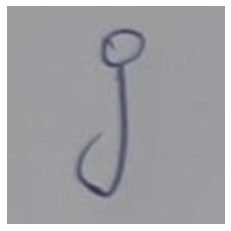

In [27]:
plt.axis("off")
plt.imshow(train_images[0])

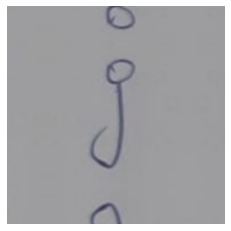

In [28]:
plt.axis("off")
plt.imshow(data_augmentation(train_images)[0].numpy().astype("uint8"))

In [29]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

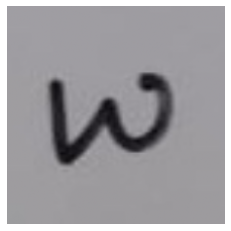

In [30]:
plt.axis("off")
plt.imshow(x_train_scaled[0])

2021-09-24 16:11:30.338695: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 563576832 exceeds 10% of free system memory.


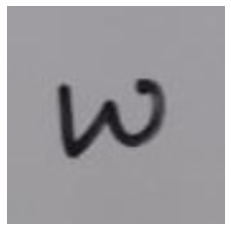

In [31]:
plt.axis("off")
plt.imshow(data_augmentation(x_train_scaled)[0].numpy())

In [32]:
x_train_scaled.shape

(468, 224, 224, 3)

In [33]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
feature_extractor, input_shape = (224,224,3), trainable = False)

In [34]:
model = tf.keras.Sequential([
    data_augmentation,
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(26, activation = "sigmoid")
])

In [35]:
x_test_scaled[0]

array([[[0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        ...,
        [0.59215686, 0.58823529, 0.60784314],
        [0.58823529, 0.58431373, 0.60392157],
        [0.58823529, 0.58431373, 0.60392157]],

       [[0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        ...,
        [0.59215686, 0.58823529, 0.60784314],
        [0.59215686, 0.58431373, 0.60784314],
        [0.59215686, 0.58431373, 0.60392157]],

       [[0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        [0.59215686, 0.58431373, 0.58823529],
        ...,
        [0.59215686, 0.58823529, 0.60392157],
        [0.59215686, 0.58823529, 0.60392157],
        [0.59215686, 0.58823529, 0.60392157]],

       ...,

       [[0.57647059, 0.56862745, 0.57254902],
        [0.57647059, 0.56862745, 0.57254902],
        [0.58039216, 0

In [36]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"]
)

In [37]:
model.fit(x_train_scaled,y_train, validation_data=(x_test_scaled, y_test), epochs = 50, verbose=2)

2021-09-24 16:13:09.706762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-24 16:13:09.771188: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299965000 Hz


Epoch 1/50
15/15 - 17s - loss: 3.3176 - acc: 0.0791 - val_loss: 3.1762 - val_acc: 0.0385
Epoch 2/50
15/15 - 10s - loss: 2.8383 - acc: 0.1880 - val_loss: 2.7986 - val_acc: 0.1731
Epoch 3/50
15/15 - 10s - loss: 2.5008 - acc: 0.3077 - val_loss: 2.4876 - val_acc: 0.2885
Epoch 4/50
15/15 - 9s - loss: 2.1840 - acc: 0.3547 - val_loss: 2.2169 - val_acc: 0.3462
Epoch 5/50
15/15 - 9s - loss: 1.9471 - acc: 0.4530 - val_loss: 2.1112 - val_acc: 0.3269
Epoch 6/50
15/15 - 10s - loss: 1.8131 - acc: 0.4765 - val_loss: 2.0223 - val_acc: 0.3846
Epoch 7/50
15/15 - 9s - loss: 1.5604 - acc: 0.5748 - val_loss: 1.9988 - val_acc: 0.2885
Epoch 8/50
15/15 - 9s - loss: 1.5068 - acc: 0.5534 - val_loss: 1.7258 - val_acc: 0.4038
Epoch 9/50
15/15 - 9s - loss: 1.4005 - acc: 0.6261 - val_loss: 1.7652 - val_acc: 0.4231
Epoch 10/50
15/15 - 8s - loss: 1.3552 - acc: 0.6239 - val_loss: 1.6392 - val_acc: 0.4808
Epoch 11/50
15/15 - 9s - loss: 1.2168 - acc: 0.6624 - val_loss: 1.6142 - val_acc: 0.4808
Epoch 12/50
15/15 - 9s - l

In [38]:
x_test.shape

(52, 224, 224, 3)

In [55]:
path = "a.jpeg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
img1 = cv2.resize(img, (224, 224))
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img1.shape

(224, 224, 3)

In [56]:
img1 = np.array(img1)
img1 = img1/255.0

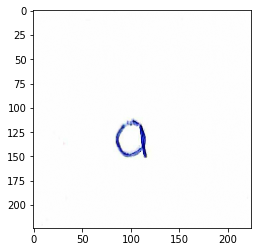

In [57]:
plt.imshow(img1)

In [58]:
img = img1[np.newaxis,...]

In [59]:
img.shape

(1, 224, 224, 3)

In [60]:
y = model.predict(img)

In [61]:
y = np.argmax(y)

In [62]:
prediction = le.inverse_transform([y])
prediction

array(['Automatic-Answer-Grader-master//dataset/O'], dtype='<U41')

In [ ]:
# path = "C:\\Users\\Satyam Kumar\\Downloads\\c2.jpg"
# img = cv2.imread(path, cv2.IMREAD_COLOR)
# img.shape

In [ ]:
# path = "C:\\Users\\Satyam Kumar\\Downloads\\pp.jpg"
# img = cv2.imread(path, cv2.IMREAD_COLOR)
# img1 = cv2.resize(img, (224, 224))
# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
# img1.shape

In [ ]:
# plt.imshow(img1)

In [ ]:
# img = img1[np.newaxis,...]

In [ ]:
# img.shape

In [ ]:
# y = model.predict(img)

In [ ]:
# y = np.argmax(y)

In [ ]:
# prediction = le.inverse_transform([y])
# prediction